# 线性回归实现

导包 用csv格式读取dataframe

In [2]:
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd

path = 'data1.txt'
data1 = pd.read_csv(path, names=['population', 'profit'])
data1

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


用散点图查看数据 现在是单元线性回归

<AxesSubplot:xlabel='population', ylabel='profit'>

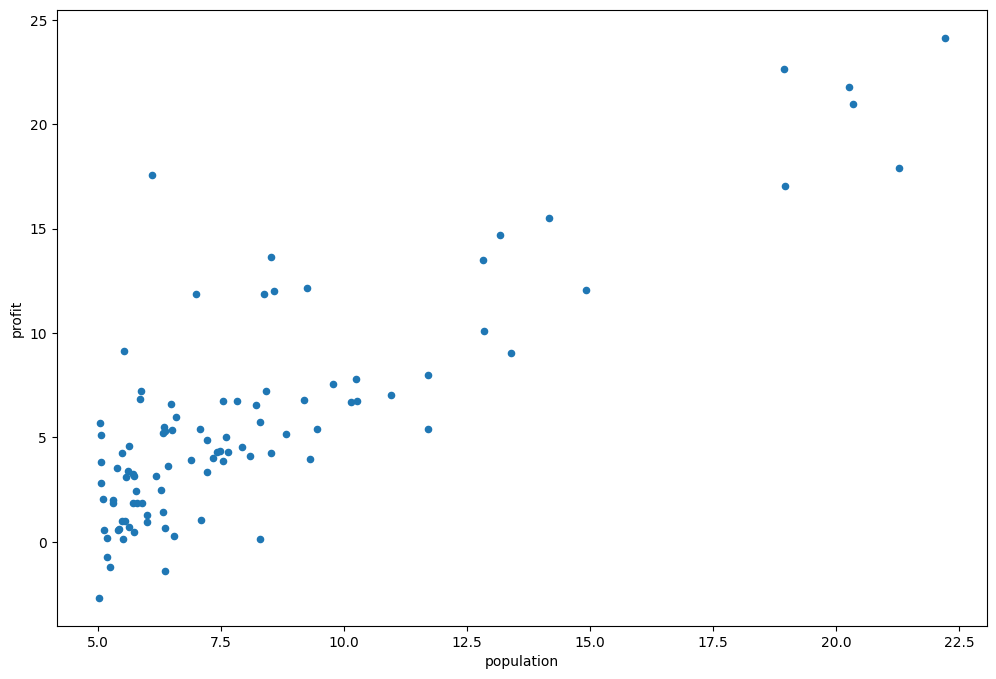

In [8]:
data1.plot(kind='scatter', x='population', y='profit', figsize=(12, 8))

可求出cost function 如下

In [54]:
def costfunc(x, y, theta):
    return np.sum(np.power((np.dot(x, theta.T)-y), 2))/2*len(x)

因为要给theta0配上数据所以增加一列x0

In [14]:
data1.insert(loc=0, column='x0', value=1)
data1.head()

,x0,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


将x改为训练set即data1除了最后一列 y是所求目标

In [27]:
x = data1.iloc[:, 0:data1.shape[1]-1]
y = data1.iloc[:, data1.shape[1]-1:data1.shape[1]]

将dataframe格式转化为np里的matrix 然后创建theta，因为一般都是从原点开始所以设置0，0

In [49]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

AttributeError: 'matrix' object has no attribute 'values'

## gradient decent
前期数据处理完成进行梯度下降

theta同时进行下降更新寻找cost函数的最佳值,
alpha是学习速率,
iters是迭代次数,
ravel函数的功能是将原数组拉伸成为一维数组  



以下式为总体的更新theta值的式子
$$
\theta _j=\theta _j-\alpha \frac{1}{m}\sum_{i=1}^m{\left( h_{\theta}\left( x^{\left( i \right)} \right) -y^{\left( i \right)} \right)}x_j^{\left( i \right)}
$$



In [50]:
def gradientDecent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))  # 短暂记录更新后的theta值
    parameters = int(theta.ravel().shape[1])  # theta的个数，但是ravel的作用不是很清楚
    cost = np.zeros(iters)  # 记录每次迭代以后的cost值

    for i in range(iters):
        error = x*theta.T-y  # 求出差值，就是上面式子最外层括号里的内容

        for j in range(parameters):  # 有几个theta就同时进行几次更新
            term = np.multiply(error, x[:, j])  # 将最外层括号外的x(j)(i)值乘上去
            temp[0, j] = theta[0, j] - \
                np.sum(term)*alpha/len(x)  # len函数效果和.shape[x]一样

        theta = temp  # 一轮迭代结束所有的theta更新一次
        cost[i] = costfunc(x, y, theta)

    return theta, cost

设置学习率和迭代次数然后进行迭代  
得到theta的最佳值

In [55]:
alpha = 0.01
iters = 1000
theta, cost = gradientDecent(x, y, theta, alpha, iters)
theta

matrix([[-3.24140214,  1.1272942 ]])

绘制线性模型和数据查看拟合度

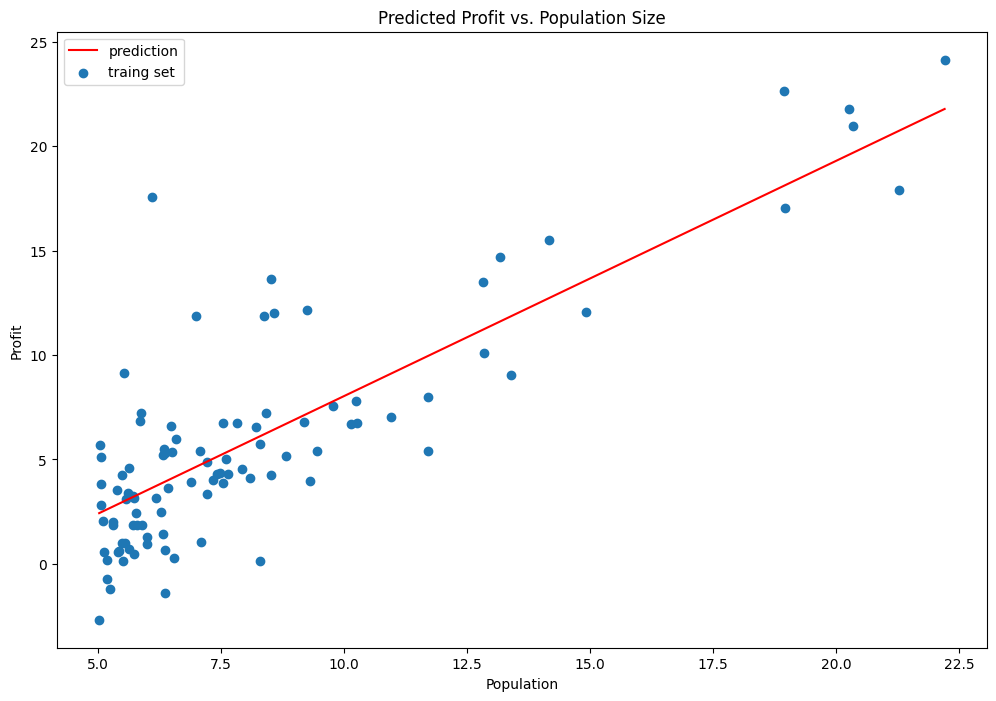

In [67]:
X = np.linspace(data1.population.min(),
                data1.population.max(), 500)  # 随机生成一百的x
func = theta[0, 0]*1+theta[0, 1]*X
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X, func, 'r', label='prediction')
ax.scatter(data1.population, data1.profit, label='traing set')
ax.legend(loc='best')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

还可以通过观察查看cost是否异常

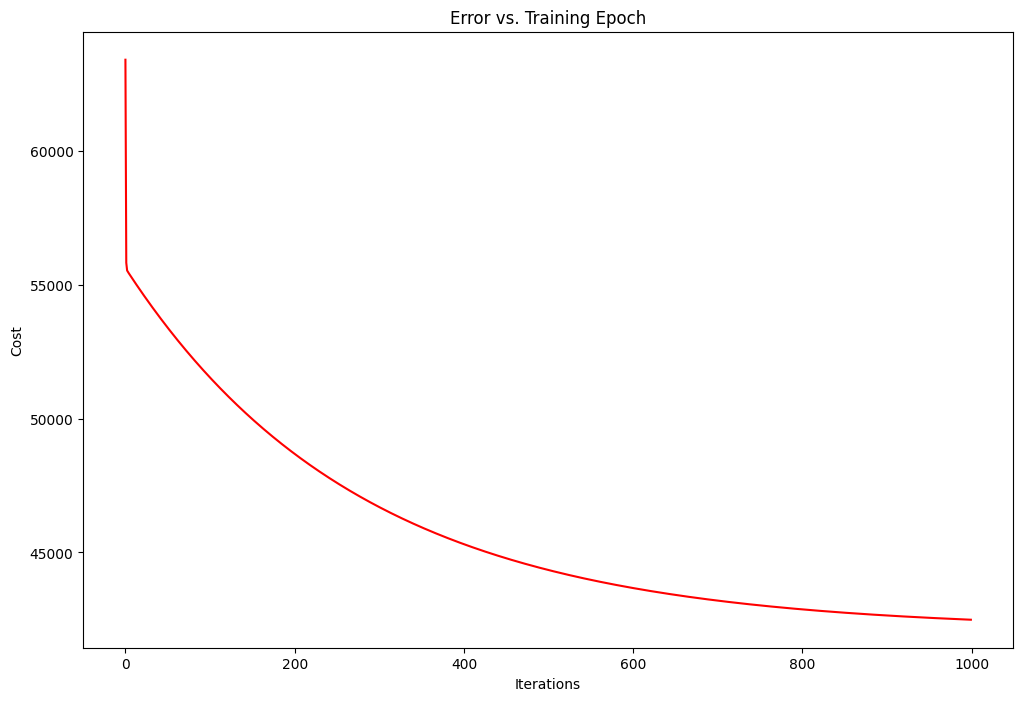

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多元线性回归
代码已经完整 载入data2即可

In [69]:
path = './data2.txt'
data2 = pd.read_csv(path, names=['size', 'bedroom', 'price'])
data2.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


进行特征归一化，就是使均值等于0，范围大致等于-1——1

In [72]:
data2 = (data2-data2.mean())/data2.std()
data2.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


根据之前的操作 插入第一项然后计算得到x，y  
然后进行计算

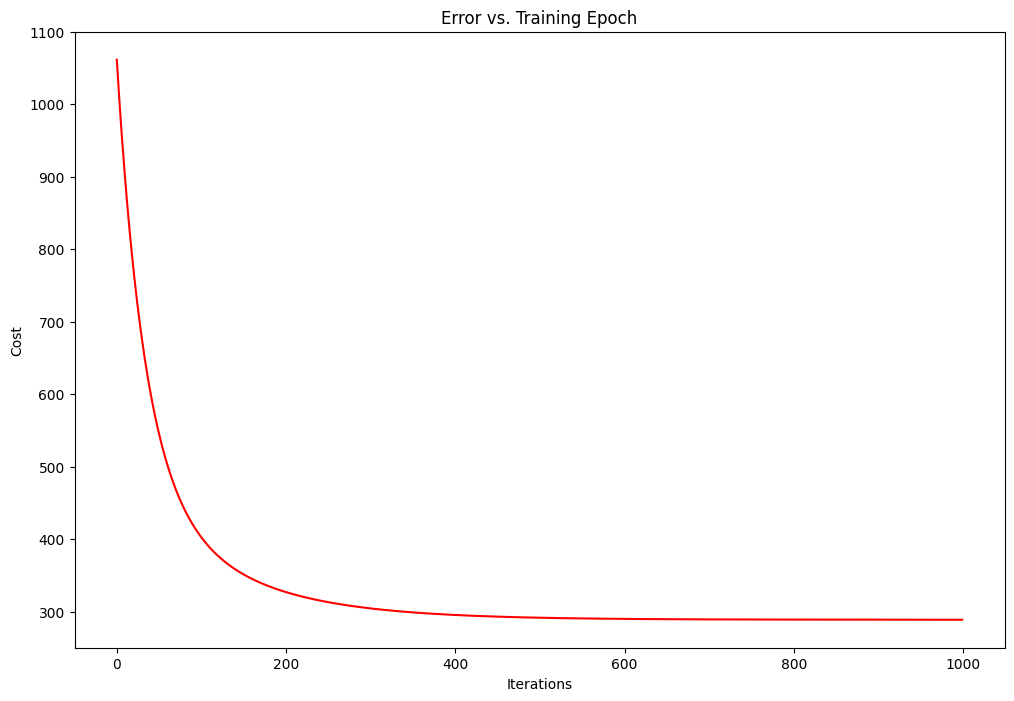

In [73]:
data2.insert(0, 'ones', 1)
x = data2.iloc[:, 0:data2.shape[1]-1]
y = data2.iloc[:, data2.shape[1]-1:data2.shape[1]]
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0, 0]))
theta, cost = gradientDecent(x, y, theta, alpha, iters)



fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()


## normal equation

正规方程适用于数量集小的数据 比如n小于1w只适用于线性模型   
这里直接搬用代码

In [75]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

final_theta2=normalEqn(x, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-1.11022302e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

In [76]:
theta#这个是梯度下降的数据

matrix([[-1.10768368e-16,  8.78503652e-01, -4.69166570e-02]])